<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/KMeansLab_SOLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Clustering Lab - CS 4372

In this lab, we will apply the K-means algorithm on synthetic as well as real dataset and also learn about machine learning pipelines.

You will need to complete the steps mentioned below and turn in the completed notebook. You can share the link of the finished notebook.

# Generate Synthetic Dataset Suitable For Clustering
We will use the following snippet to load libraries and generate some synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


Let's plot this 2-D dataset

<Axes: >

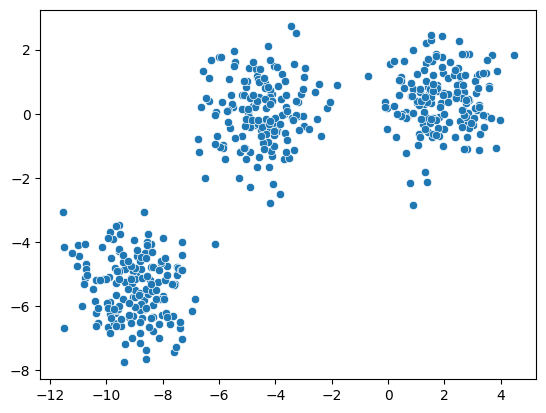

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1])

Now, it's your turn to create a synthetic dataset of 3 dimensions consisting of three clusters. You will also need to visualize this data using a 3-D plot. You can use any suitable library.

In [4]:
# TODO: Create a 3 feature dataset generated using 3 clusters and plot it.
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=3,
                  centers=3, random_state=random_state)


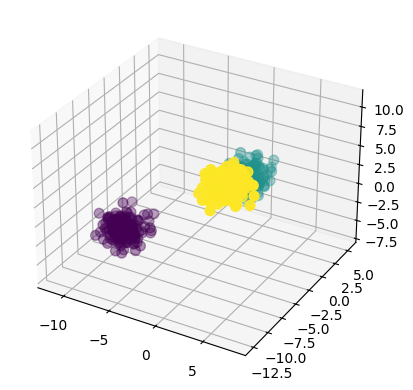

In [5]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=50)

## Clustering using k-means

Let's go back to the 2-D dataset generated earlier and let's try to cluster it using k-means. We know how many clusters are *actually* there.

In [6]:
predicted_clusters = 2 # need to play with this to get the correct value
max_iter = 100
random_state = 42

km = KMeans(n_clusters=predicted_clusters, random_state=random_state, max_iter=max_iter)

In [ ]:
km

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [7]:
y_pred = km.fit_predict(X)

## Visualization of Clusters

Let's create side-by-side plots of actual vs clustered data
for the clustered data, we also want to include the predicted centers

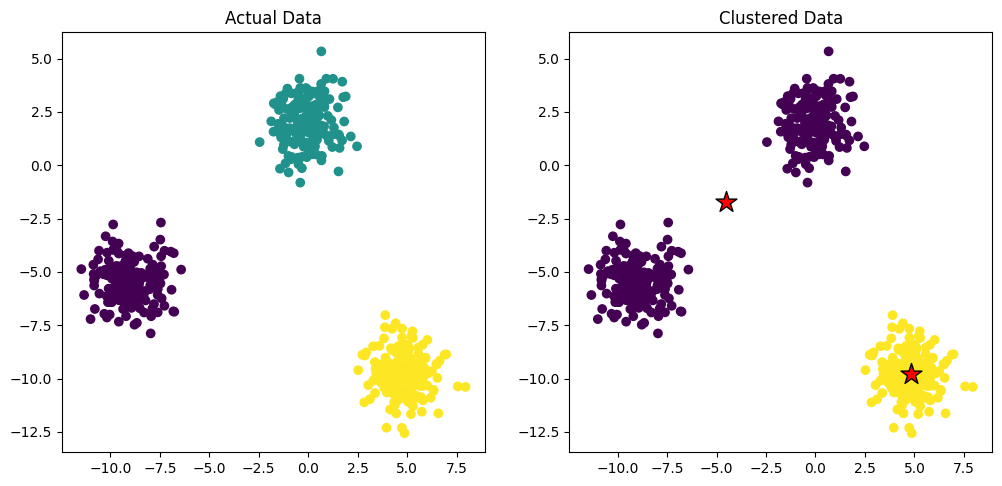

In [8]:


plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Actual Data")

plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Clustered Data")

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.show()

## WCSS and Silhouette Score

Let's compute the evaluation criteria for clustering: WCSS and Silhouette score

In [9]:
km.inertia_

14877.992173039403

In [10]:
silhouette_score(X, y_pred)

np.float64(0.6686894598427355)

## Finding Best Hyperparameters

We want to automatically try various values of the hyperparameter k and obtain the evaluation criteria to see which values are the best.

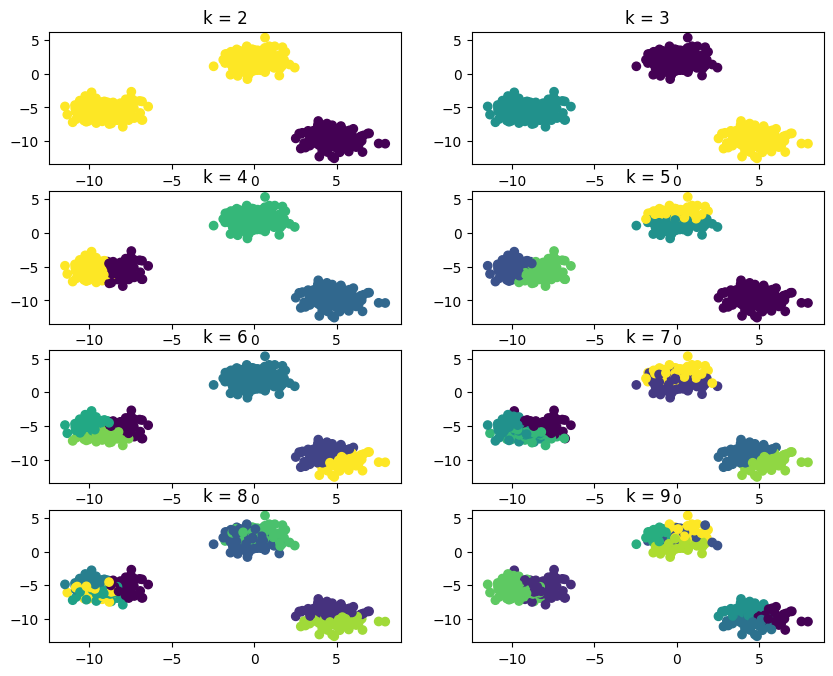

In [11]:
plt.figure(figsize=(10, 10))

i = 1
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  plt.subplot(5, 2, i)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.title("k = " + str(k))
  i = i + 1

plt.show()

Now, try to find the WCSS and Silhouette width for each value of k and plot them. Which seems to be the best value for k?

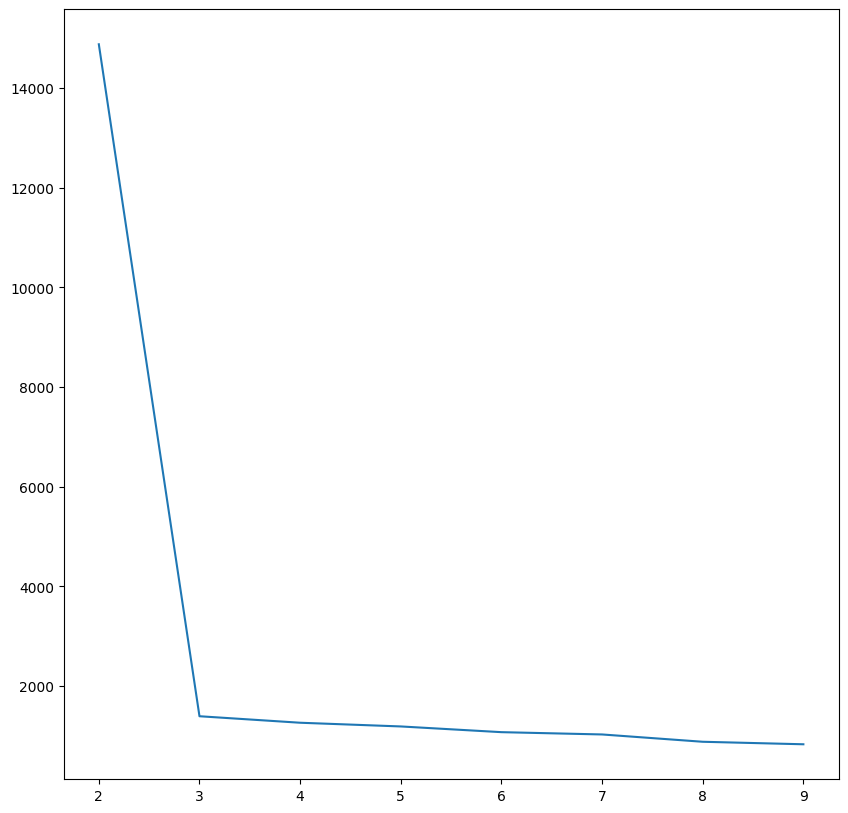

In [12]:
# TODO: Code what is stated above.
plt.figure(figsize=(10, 10))

WCSS = []

i = 0
for k in range(2, 10):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(X)
  WCSS.append(km.inertia_)
  i = i + 1

plt.plot(range(2,10), WCSS)
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.6686894598427355
For n_clusters = 3 The average silhouette_score is : 0.8380632670307603
For n_clusters = 4 The average silhouette_score is : 0.6363489344927175
For n_clusters = 5 The average silhouette_score is : 0.42792884225806527
For n_clusters = 6 The average silhouette_score is : 0.23676851640746746
For n_clusters = 7 The average silhouette_score is : 0.23458889343453193
For n_clusters = 8 The average silhouette_score is : 0.2203464014261098
For n_clusters = 9 The average silhouette_score is : 0.21972263415446172


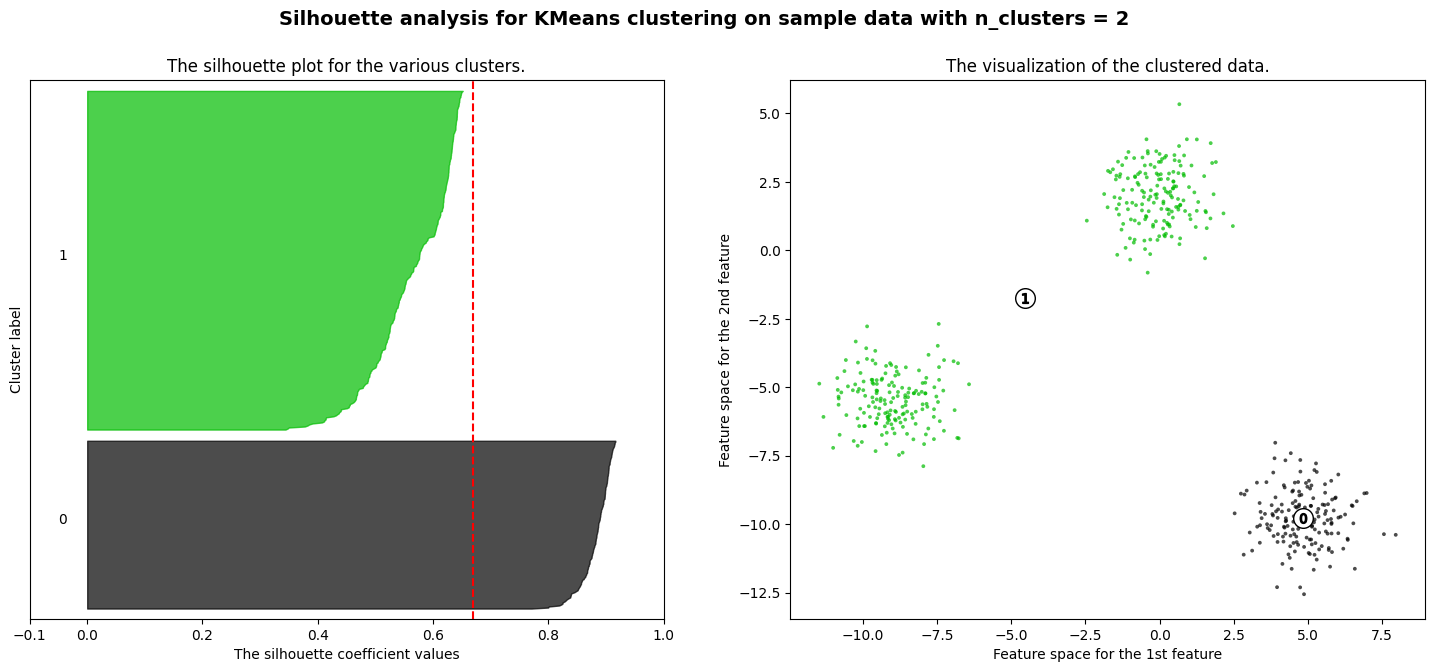

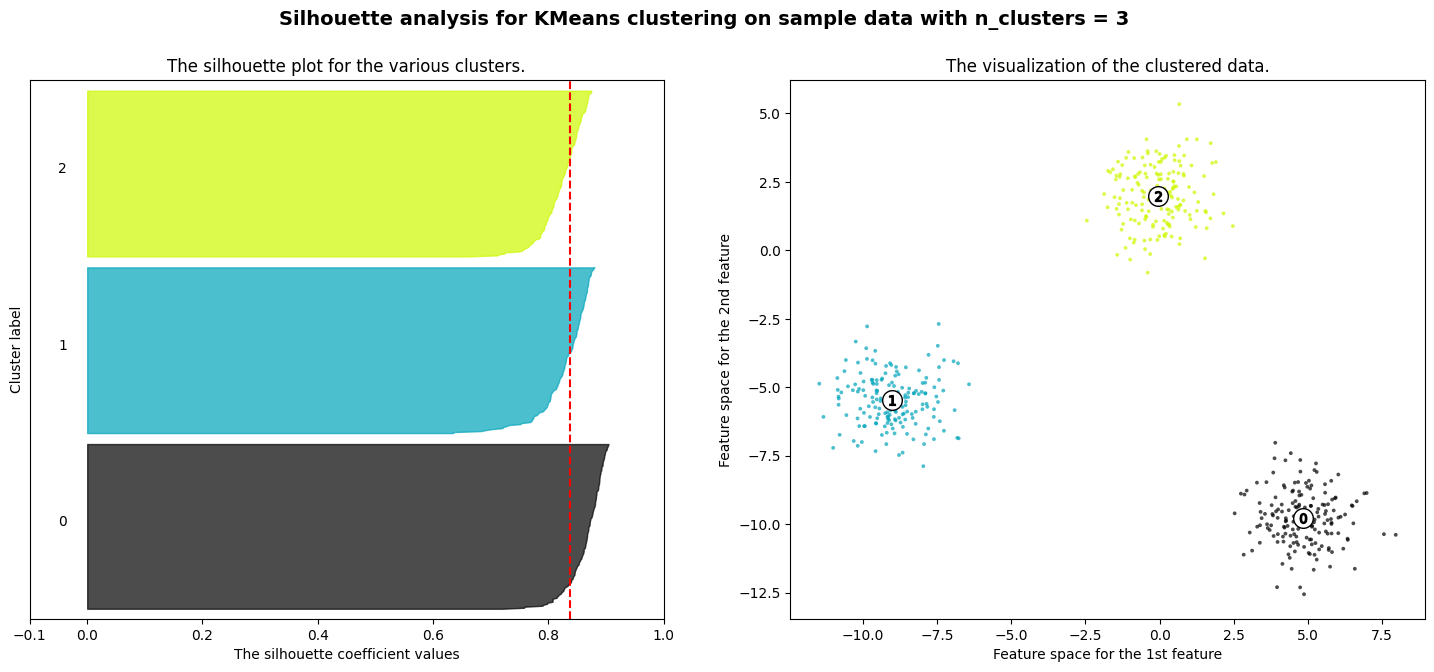

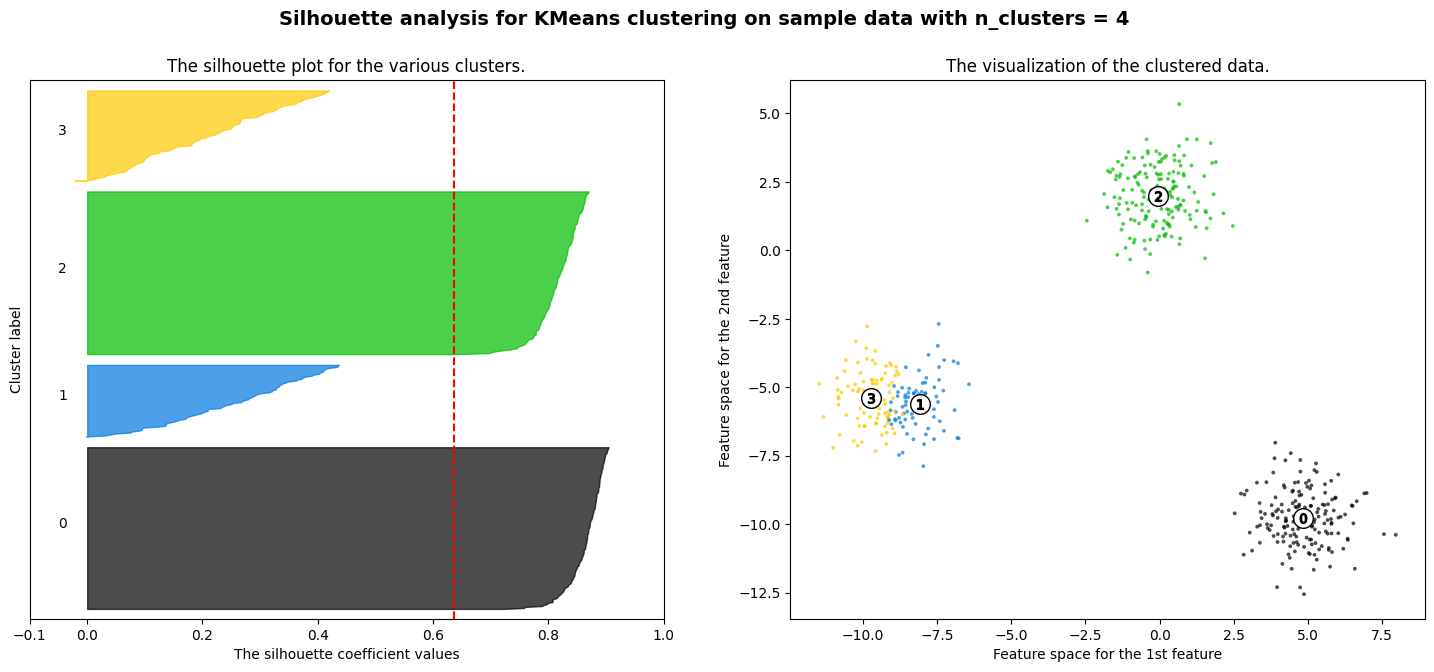

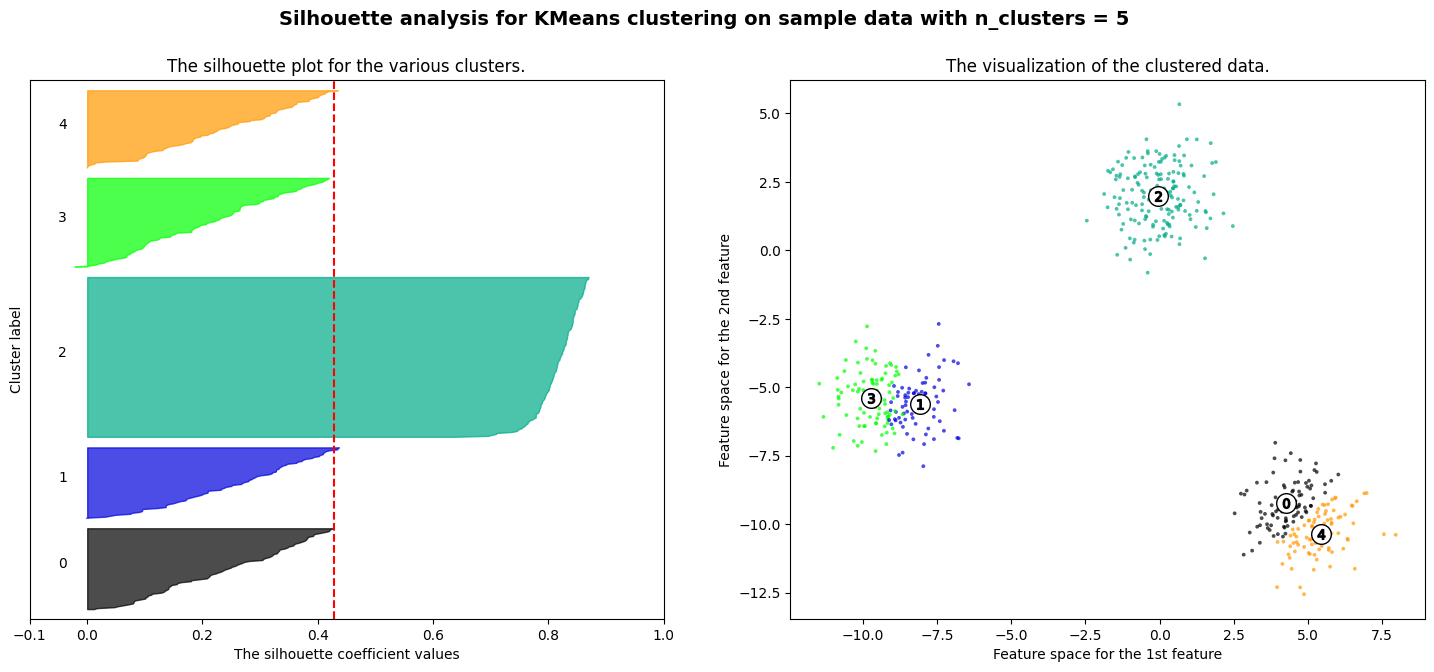

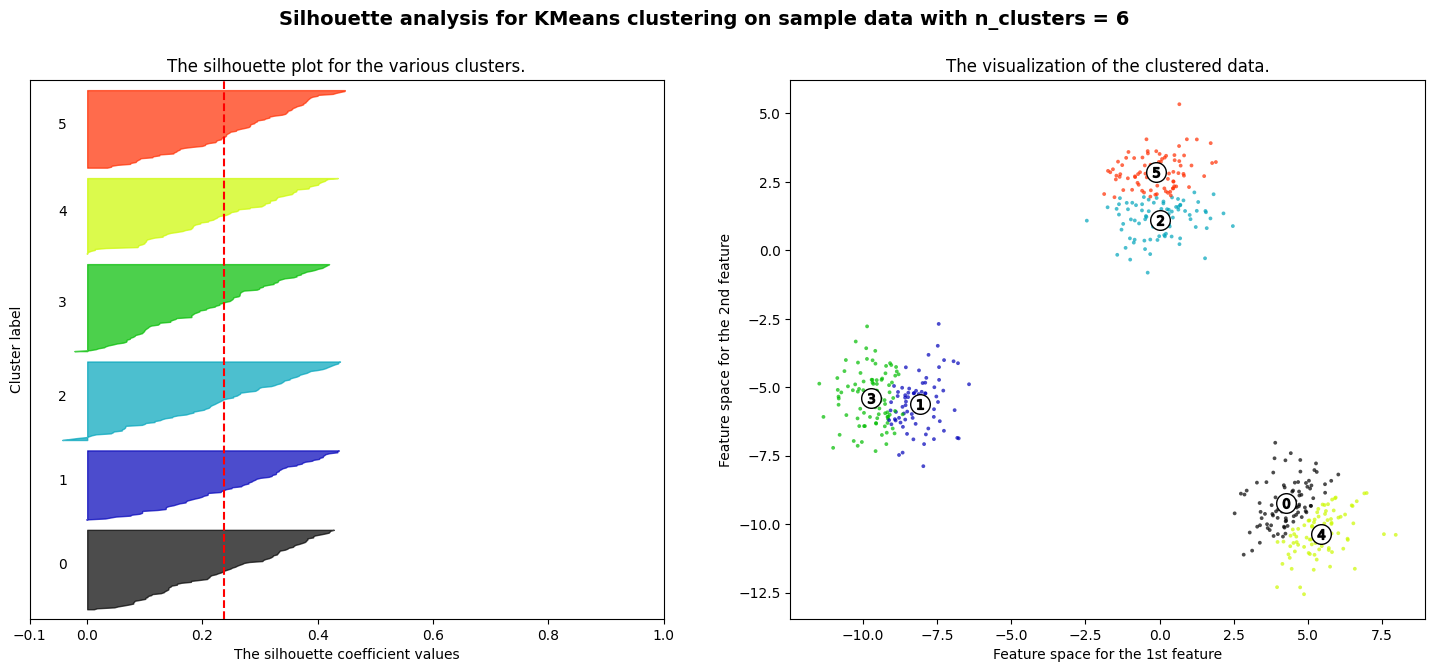

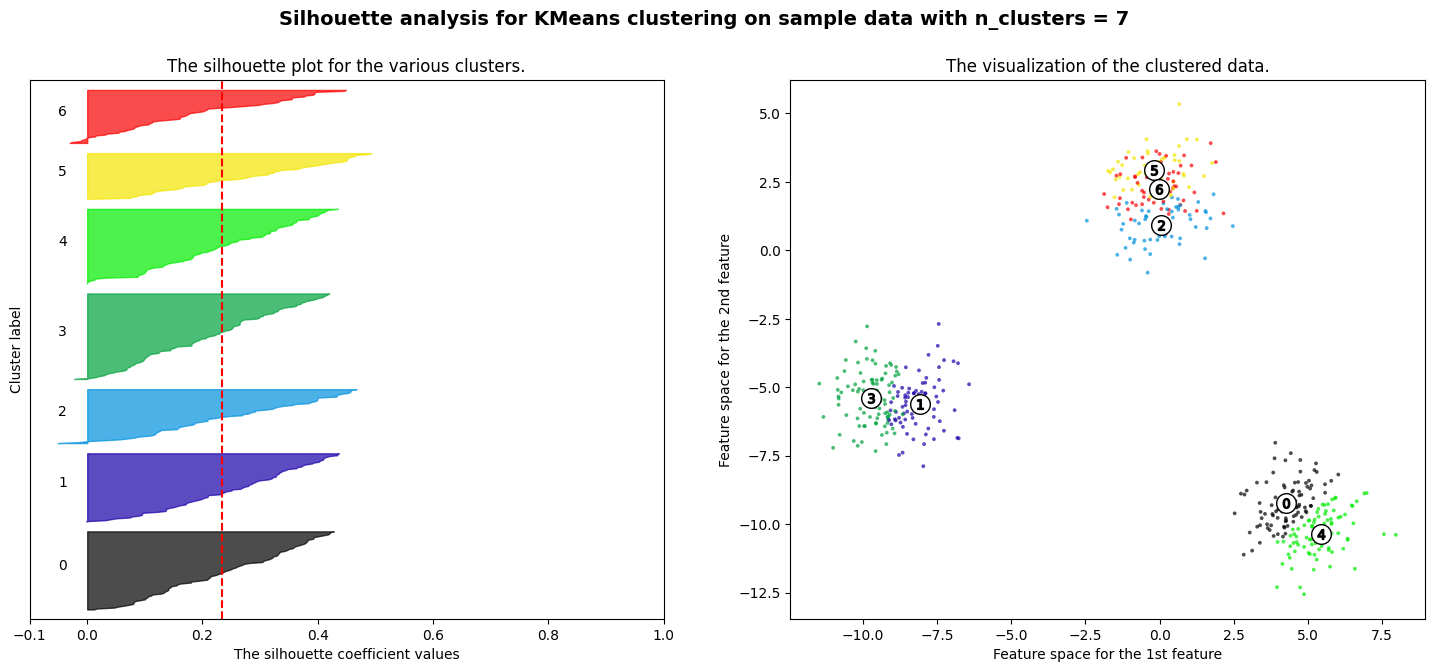

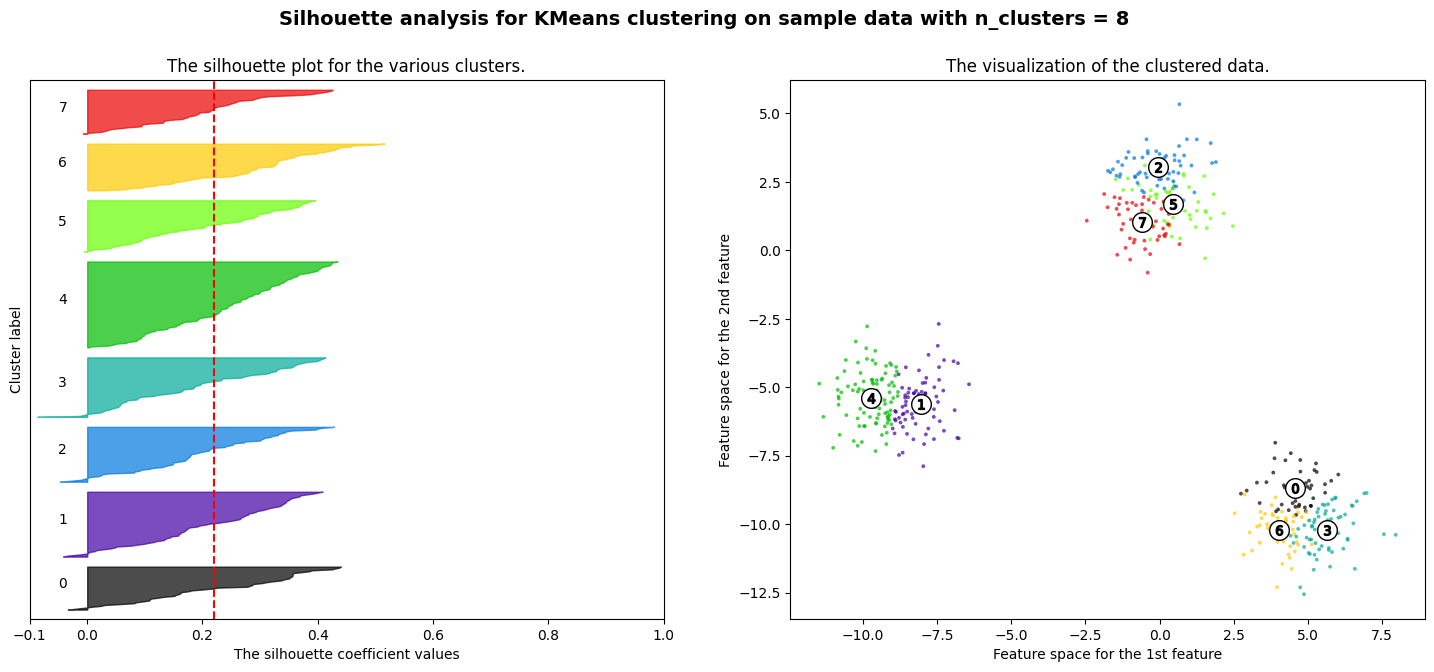

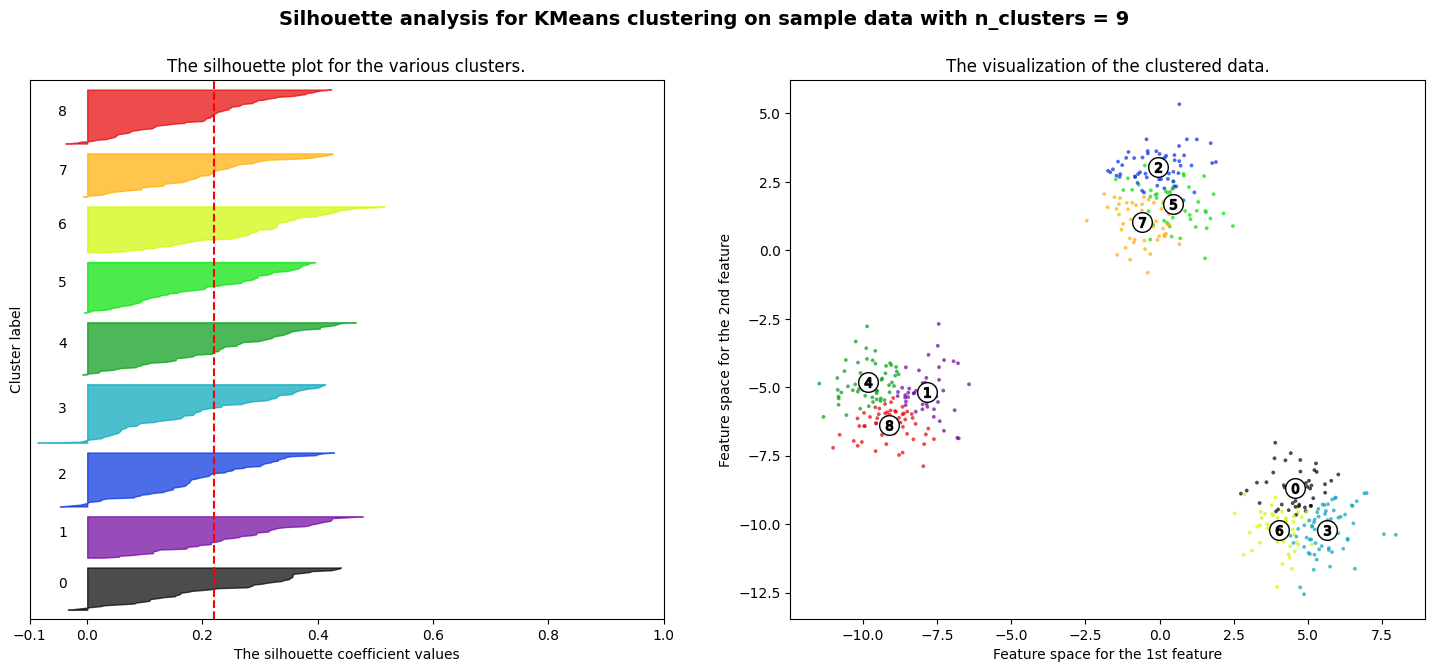

In [13]:
import matplotlib.cm as cm
for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Working with the California Housing Dataset

Download the California housing dataset

In [ ]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/a-nagar/datasets/main/housing_clustering.csv")

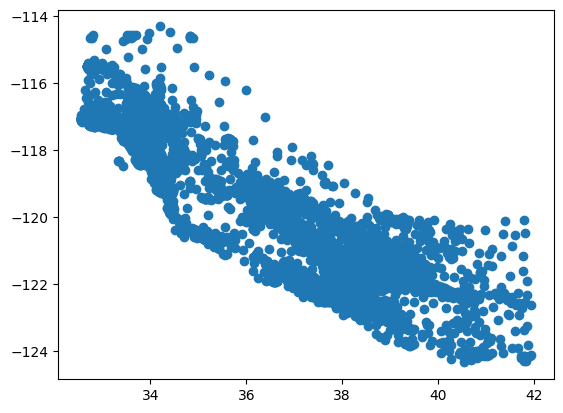

In [ ]:
#TODO: Make a scatter plot of latitude and longitude
#TODO: Make a scatter plot of latitude and longitude
X = housing['latitude']
Y = housing['longitude']
plt.scatter(X, Y)
plt.show()

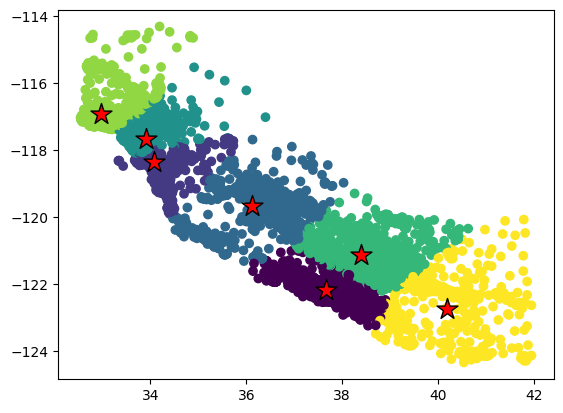

In [ ]:
#TODO: Perform K-Means clustering and check if the centers resemble the location of major cities/areas in California

k = 7
my_cols = housing[['latitude', 'longitude']]

km = KMeans(n_clusters=k)
km.fit_transform(my_cols)

X = housing['latitude']
Y = housing['longitude']
plt.scatter(X, Y, c=km.labels_)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.show()


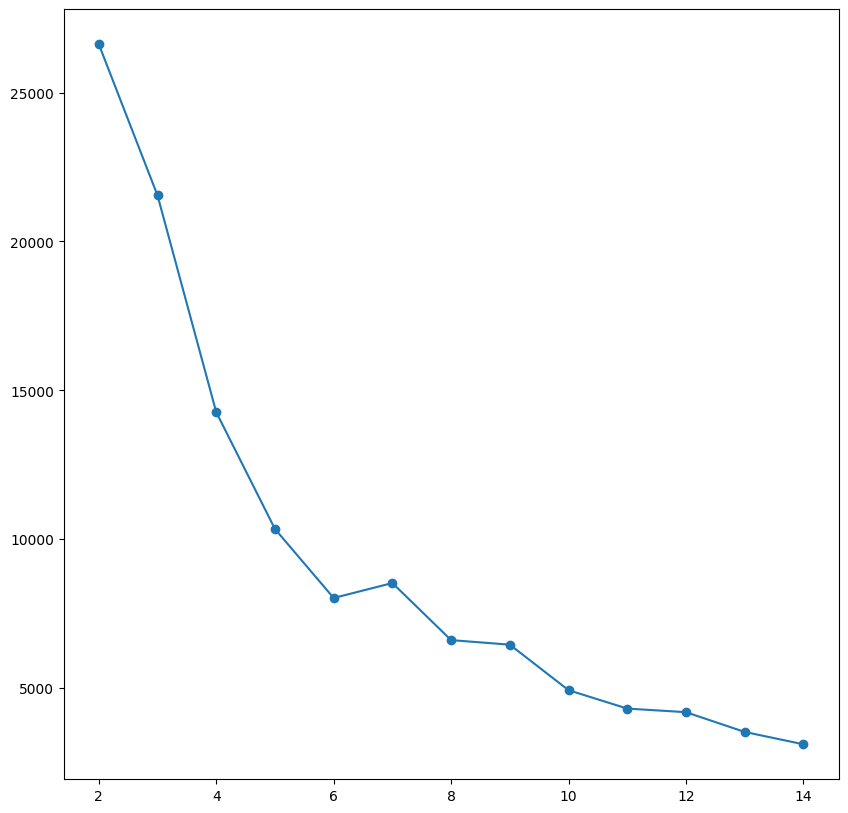

In [ ]:
#TODO: Using WCSS or Silhouette Width, find best value of K

# TODO: Code what is stated above.
plt.figure(figsize=(10, 10))

WCSS = []

i = 0
for k in range(2, 15):
  km = KMeans(n_clusters=k)
  y_pred = km.fit_predict(my_cols)
  WCSS.append(km.inertia_)
  i = i + 1

plt.plot(range(2,15), WCSS, marker='o')
plt.show()

## Working with US Arrests Data and Pipelines

Let's read the USArrests data that can be downloaded from:

https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv


In [ ]:
# TODO: Read in the file to a dataframe and ensure everything is loaded properly
arrests = pd.read_csv("https://an-ml.s3.us-west-1.amazonaws.com/USArrests.csv", index_col=0)

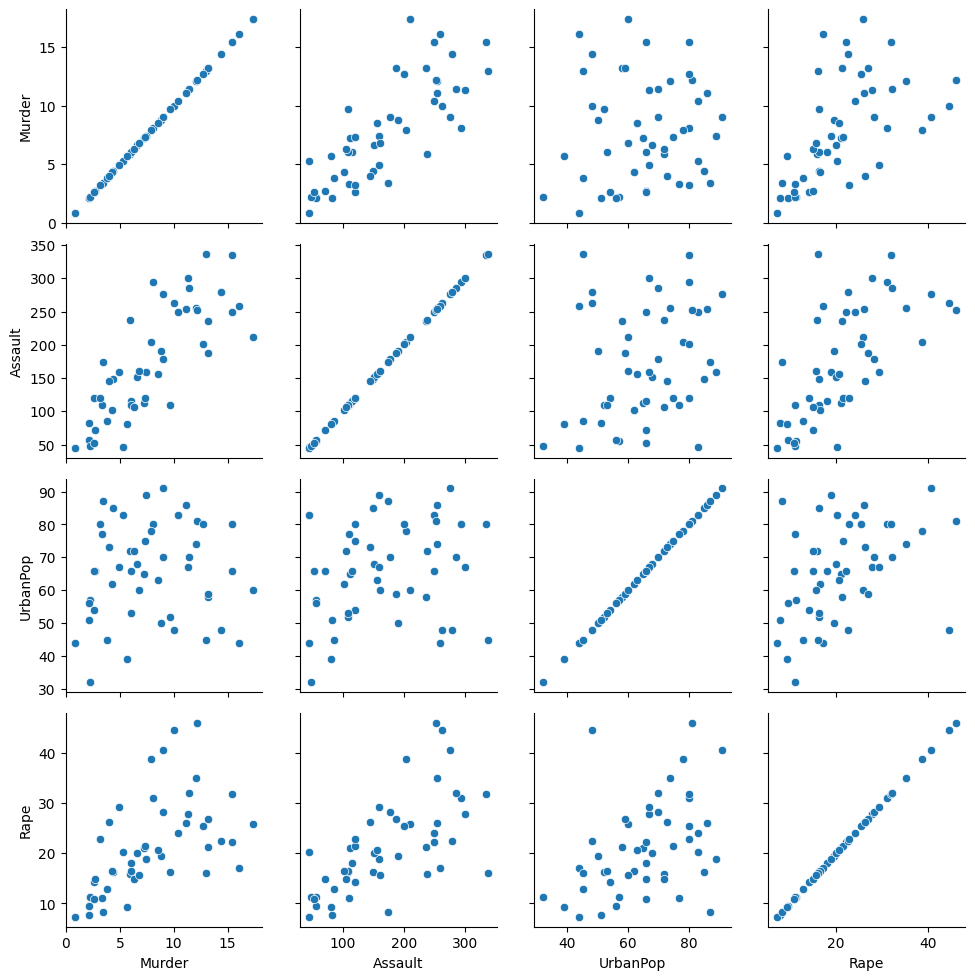

In [ ]:
# TODO: Create a pairwise scatter plot and visualize relationships between variables
# https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships
g = sns.PairGrid(arrests)
g.map(sns.scatterplot)

In [ ]:
# TODO: Let's create a pipeline of scaler and then k-means and use it on the dataset
kmeansPipeline = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("kmeans", KMeans(n_clusters=4, max_iter=500)),
    ]
)

In [ ]:
# TODO: apply the pipeline on the data

kmeansPipeline.fit_predict(arrests)

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 2, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int32)

In [ ]:
# TODO: try various values of k and check which value of k may be the best
arrests["label"] = kmeansPipeline["kmeans"].labels_

In [ ]:
# TODO: I would like to see which states belong to which cluster. Output that data in a suitable format.
arrests.sort_values("label")

,Murder,Assault,UrbanPop,Rape,label
Illinois,10.4,249,83,24.0,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,0
New Mexico,11.4,285,70,32.1,0
Michigan,12.1,255,74,35.1,0
Florida,15.4,335,80,31.9,0
Maryland,11.3,300,67,27.8,0
Nevada,12.2,252,81,46.0,0


In [ ]:
#TODO: I would like to live in a state that is different in crime from TX. What choices do I have? Which states have lowest crime profiles?

# Hierarchical Clustering

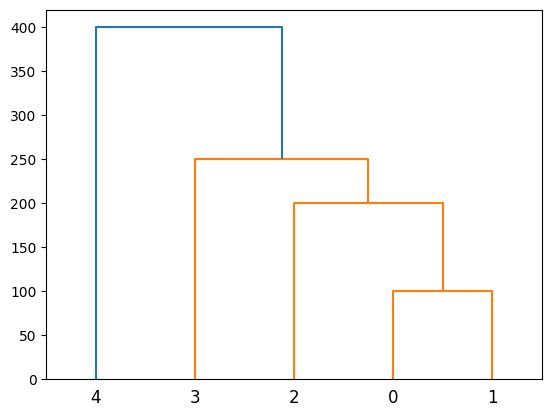

In [ ]:
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# Create an array
x = np.array([100., 200., 300., 400., 500., 250.,
              450., 280., 450., 750.])

# Plot the hierarchical clustering as a dendrogram.
link = hierarchy.linkage(x, 'single')
plt.figure()

dn = hierarchy.dendrogram(link)



<Figure size 640x480 with 0 Axes>

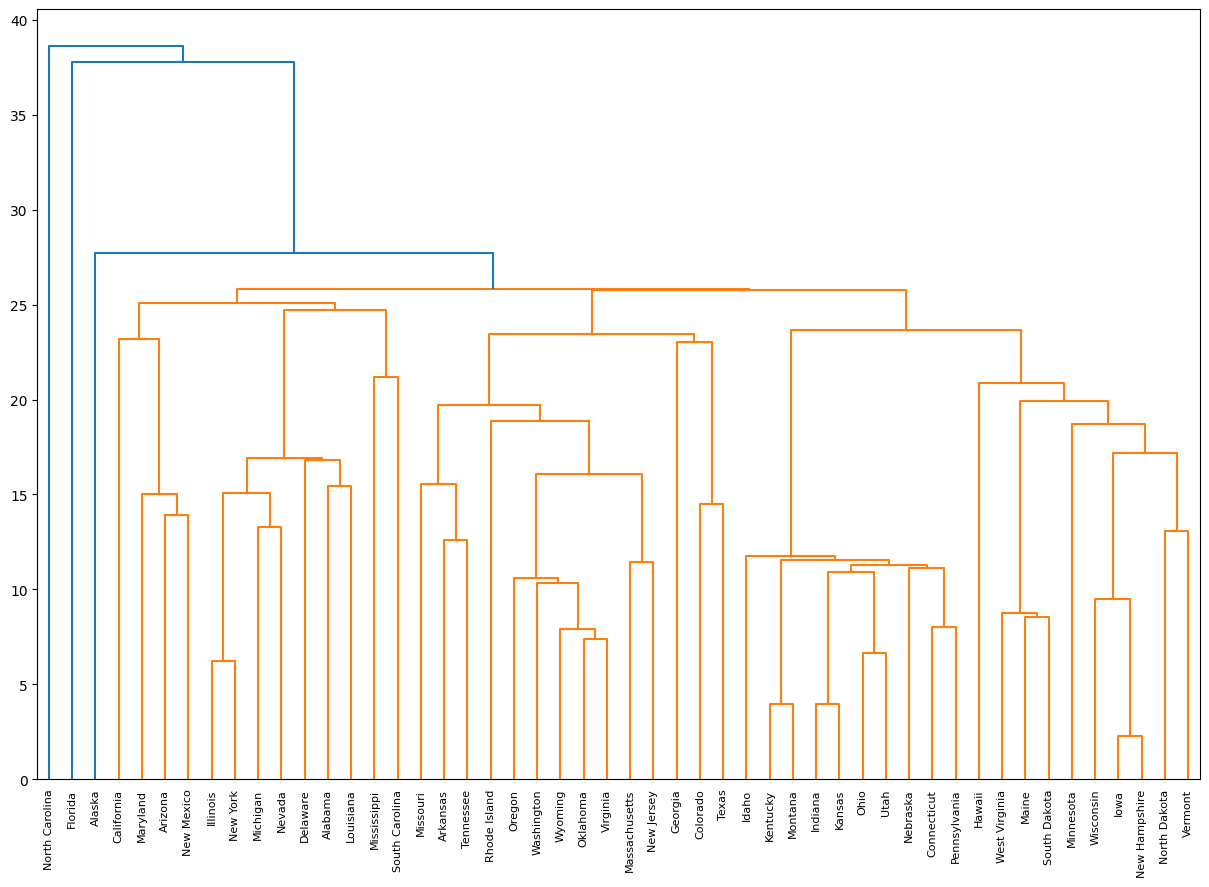

In [ ]:
temp = hierarchy.linkage(np.array(arrests), 'single')
plt.figure()
plt.figure(figsize=(15, 10))
dn = hierarchy.dendrogram(
    temp, labels = arrests.index)

# Expectation-Maximization with Gaussian Mixture Models

One-dimensional dataset. We start with random parameters and assign probabilistically until convergence. The one-D Gaussian should be familiar to you.

Converged after 15 iterations.


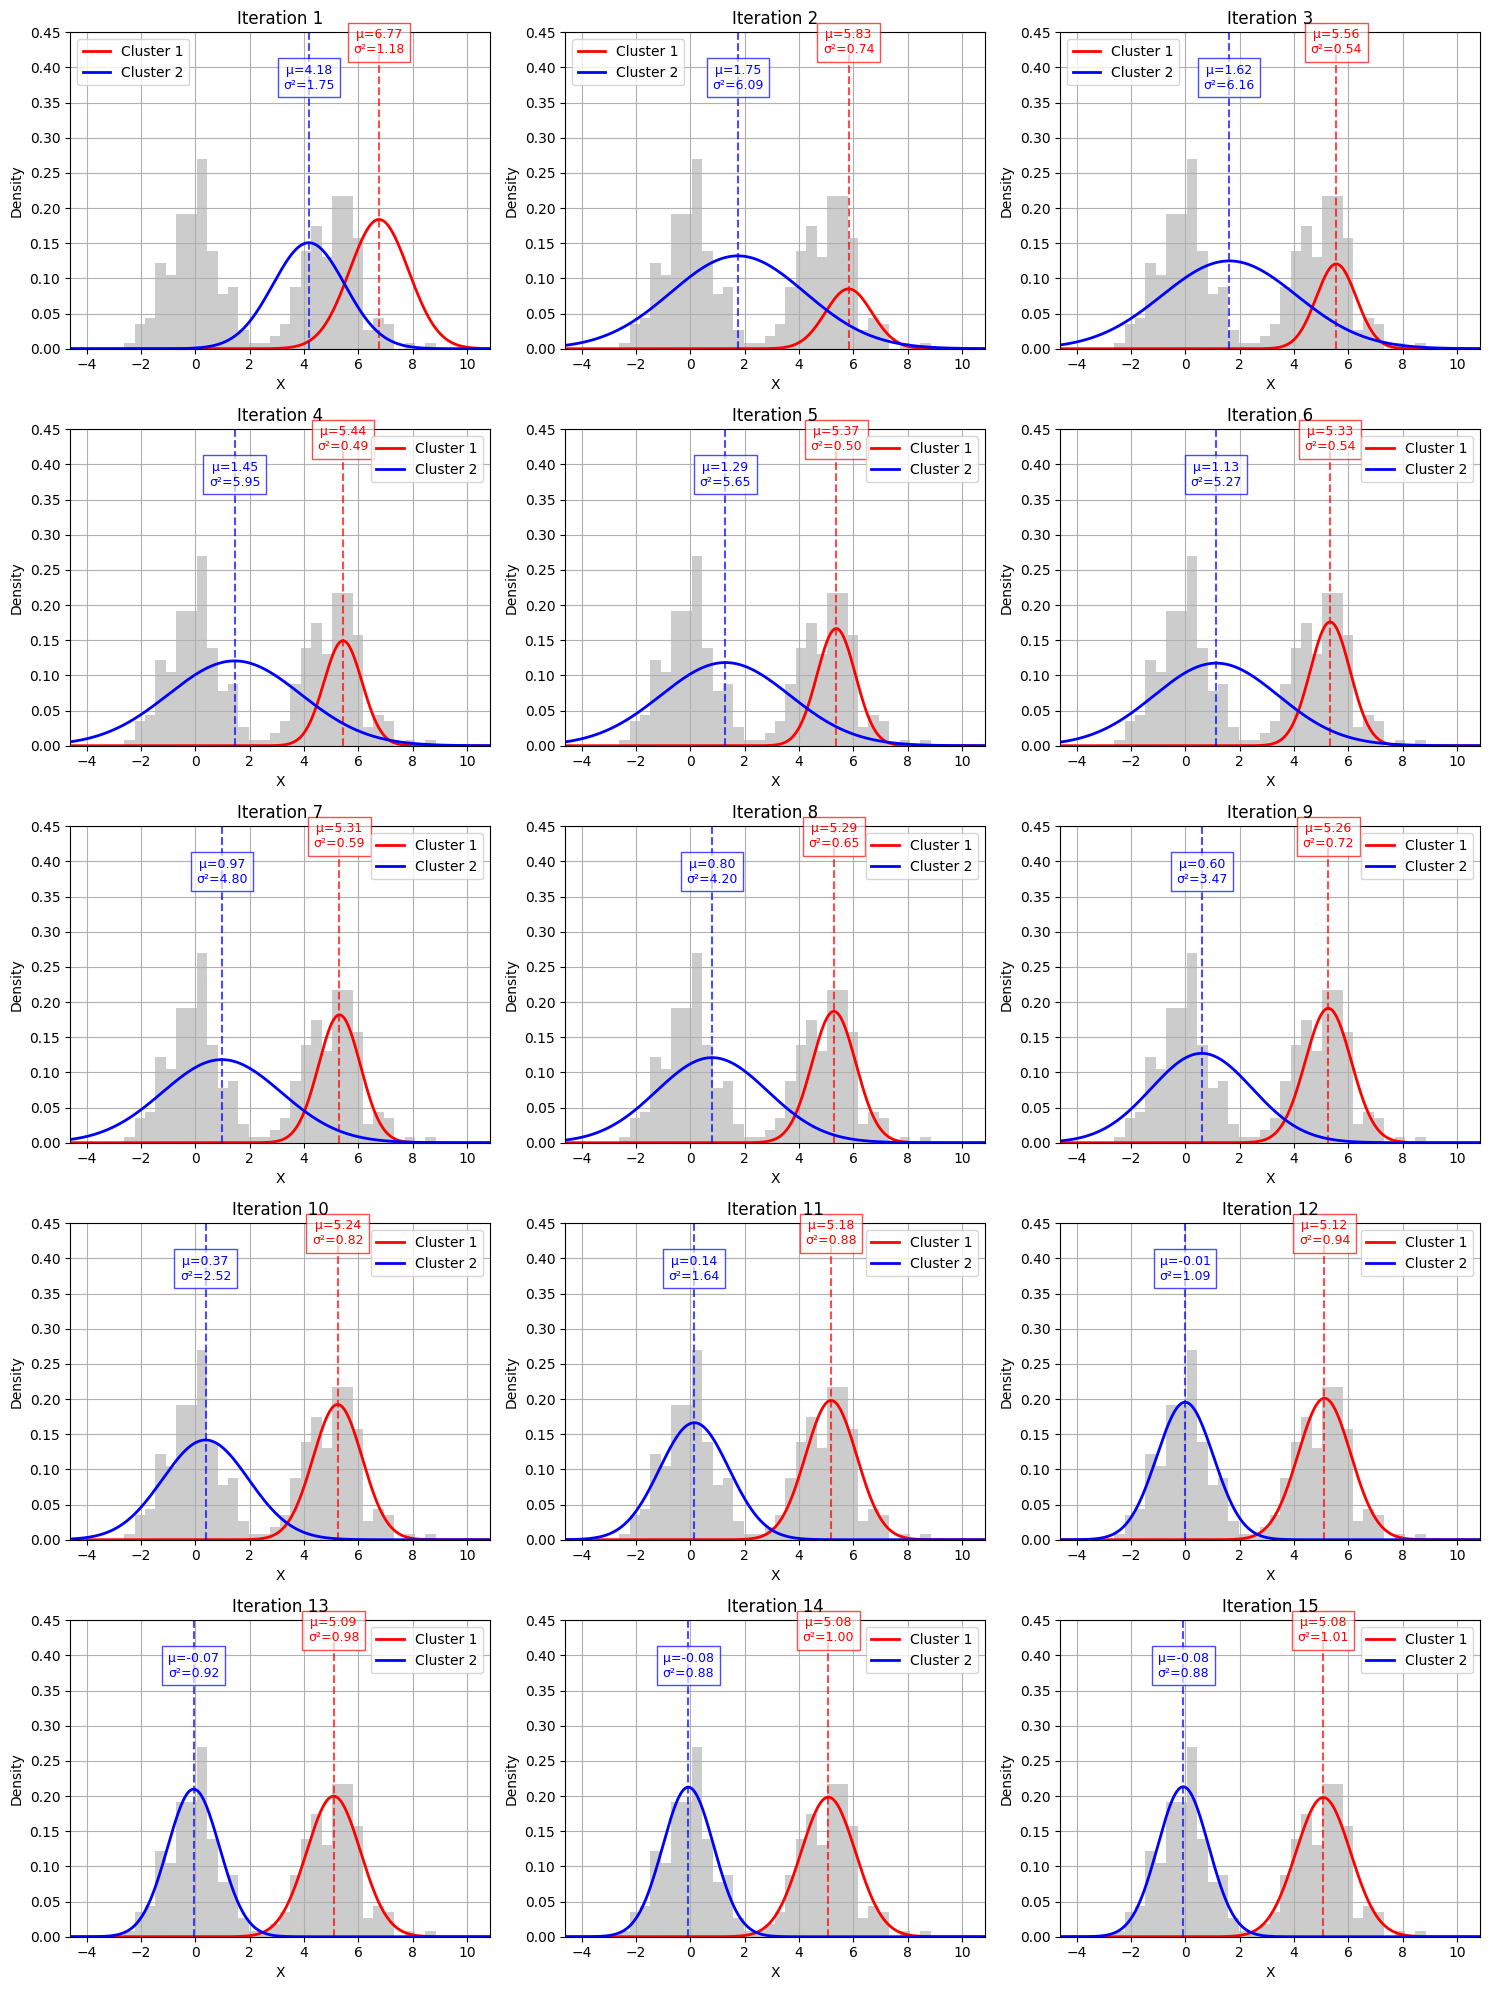

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ----------------------------
# 1. Generate synthetic 1D data
# ----------------------------
np.random.seed(42)
data1 = np.random.normal(0, 1, 150)
data2 = np.random.normal(5, 1, 150)
X = np.concatenate([data1, data2])

# ----------------------------
# 2. Initialize EM parameters
# ----------------------------
K = 2  # number of clusters
means = np.random.choice(X, K)
variances = np.random.random(K) + 1
weights = np.ones(K) / K

# ----------------------------
# Helper functions
# ----------------------------
def expectation(X, means, variances, weights):
    """E-step: compute responsibilities."""
    responsibilities = np.zeros((len(X), K))
    for k in range(K):
        responsibilities[:, k] = weights[k] * norm.pdf(X, means[k], np.sqrt(variances[k]))
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

def maximization(X, responsibilities):
    """M-step: update parameters."""
    Nk = responsibilities.sum(axis=0)
    weights = Nk / len(X)
    means = (responsibilities * X[:, np.newaxis]).sum(axis=0) / Nk
    variances = (responsibilities * (X[:, np.newaxis] - means)**2).sum(axis=0) / Nk
    return means, variances, weights

# ----------------------------
# 3. Run EM until convergence and store snapshots
# ----------------------------
snapshots = []
max_iter = 20
tol = 1e-3

for i in range(max_iter):
    responsibilities = expectation(X, means, variances, weights)
    new_means, new_variances, new_weights = maximization(X, responsibilities)

    # Store snapshot for plotting later
    snapshots.append((i+1, means.copy(), variances.copy(), weights.copy()))

    if np.allclose(means, new_means, atol=tol):
        print(f"Converged after {i+1} iterations.")
        break

    means, variances, weights = new_means, new_variances, new_weights

# ----------------------------
# 4. Visualization setup
# ----------------------------
x_grid = np.linspace(min(X)-2, max(X)+2, 1000)
x_min, x_max = min(X)-2, max(X)+2
y_min, y_max = 0, 0.45

# Create subplots for each iteration (max 6 per row)
n_iter = len(snapshots)
cols = 3
rows = int(np.ceil(n_iter / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
axes = axes.flatten()

# ----------------------------
# 5. Plot each iteration snapshot
# ----------------------------
for idx, (iteration, means, variances, weights) in enumerate(snapshots):
    ax = axes[idx]
    ax.hist(X, bins=30, density=True, alpha=0.4, color='gray')

    for k, color in zip(range(K), ['red', 'blue']):
        pdf = weights[k] * norm.pdf(x_grid, means[k], np.sqrt(variances[k]))
        ax.plot(x_grid, pdf, color=color, lw=2, label=f'Cluster {k+1}')
        ax.axvline(means[k], color=color, linestyle='--', alpha=0.7)
        ax.text(means[k], 0.42 - 0.05*k,
                f"μ={means[k]:.2f}\nσ²={variances[k]:.2f}",
                color=color, ha='center', fontsize=9,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor=color))

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Iteration {iteration}")
    ax.set_xlabel("X")
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

# Hide unused subplots if any
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Two-dimensional Gaussian example

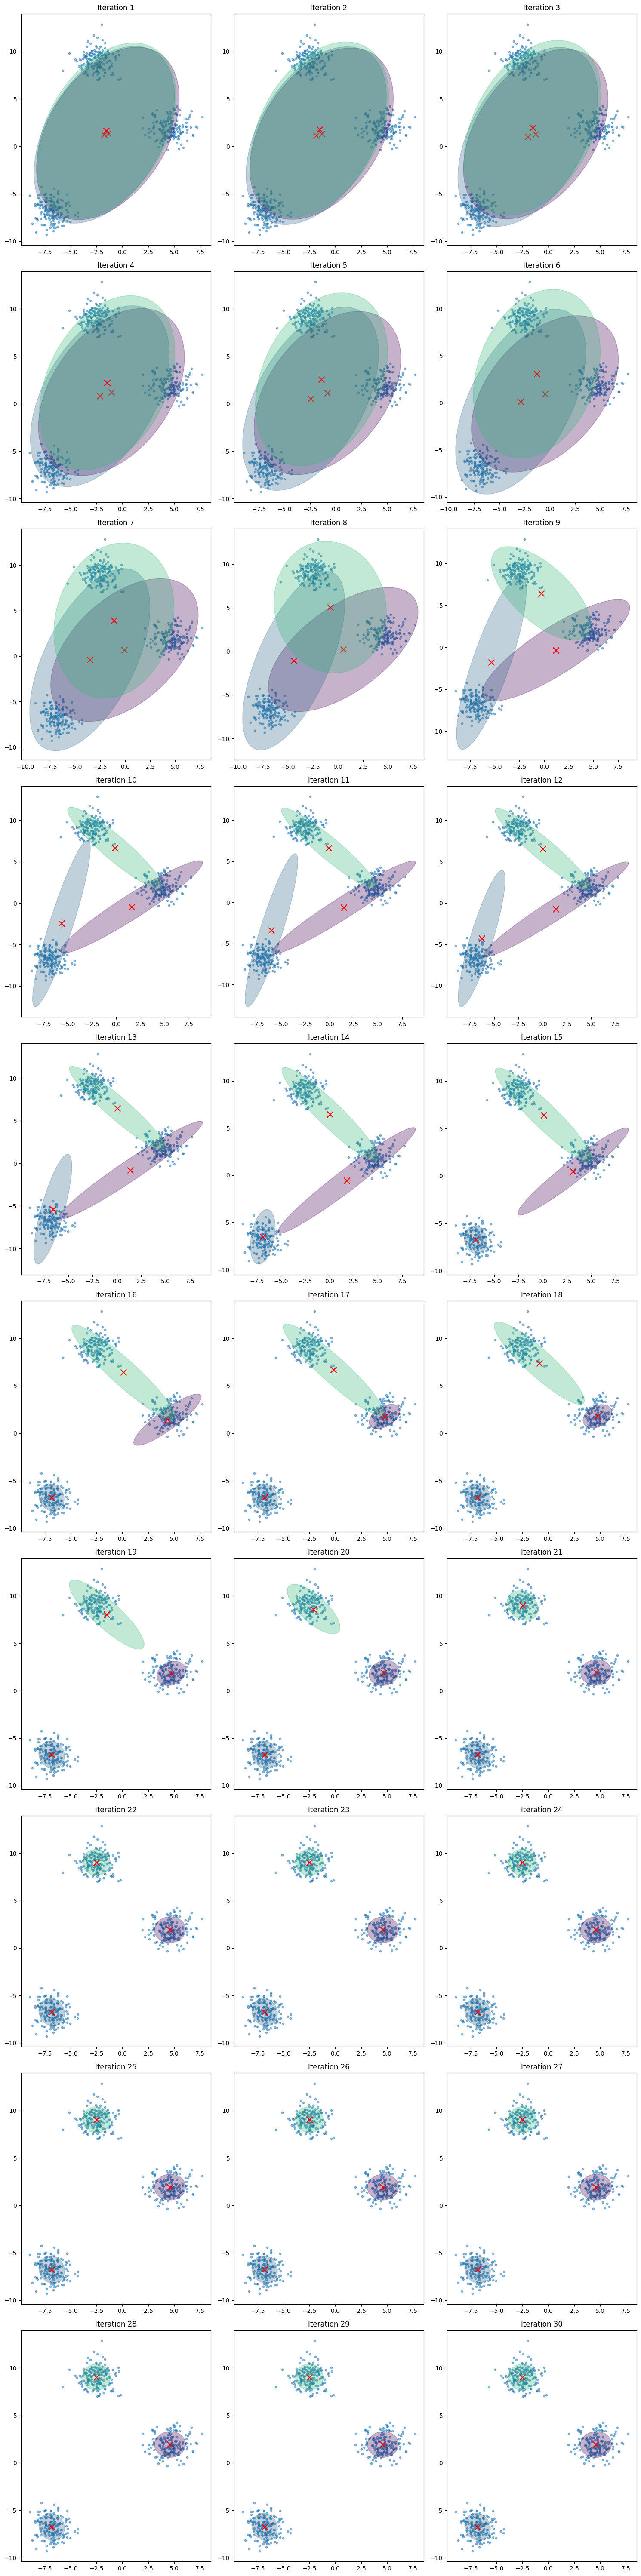

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings("ignore")

# Helper function to draw an ellipse for a GMM component
def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance."""
    # Convert covariance to principal axes for plotting
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        # Angle of rotation
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        # Width and height of ellipse (e.g., 2 standard deviations for size)
        width, height = 2 * np.sqrt(2 * s)
    else:
        # Handle other covariance types if needed (e.g., spherical, diag, tied)
        # This implementation only works for 'full' covariance
        pass

    # Create and add the Ellipse patch
    # Pass 'position' as a single xy argument (tuple)
    ellipse = Ellipse(xy=position, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

# 1. Generate sample data
X, y_true = make_blobs(n_samples=500, centers=3,
                       cluster_std=1.0, random_state=42)

# 2. Initialize GMM parameters
n_components = 3
# Set warm_start=True to reuse the solution of the previous call to fit
# Set max_iter=1 to perform a single EM iteration per fit call
gmm = GaussianMixture(n_components=n_components, covariance_type='full',
                      init_params='random', max_iter=1, random_state=0, warm_start=True)

# 3. Iterate and Visualize over 6 iterations
n_iterations_to_plot = 30
fig, axes = plt.subplots(10, 3, figsize=(15, 60))
# Flatten the axes array for easy iteration
axes = axes.ravel()

for i in range(n_iterations_to_plot):
    # Perform one EM iteration using fit()
    gmm.fit(X)

    # Get current parameters
    means = gmm.means_
    covariances = gmm.covariances_
    weights = gmm.weights_

    ax = axes[i]
    # Plot data
    ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.5)
    ax.set_title(f'Iteration {i+1}')

    # Plot current Gaussian components
    for j in range(n_components):
        draw_ellipse(means[j], covariances[j], ax, alpha=0.3, color=plt.cm.viridis(j / n_components))
        # Plot mean centers as 'x'
        ax.scatter(means[j, 0], means[j, 1], marker='x', color='red', s=100)

plt.tight_layout()
plt.show()


# Density Based Clustering

In [ ]:
n_samples = 500
random_state = 170

X, y = make_blobs(n_samples=n_samples, n_features=2,
                  centers=3, random_state=random_state)


In [ ]:
df = pd.DataFrame(X)
df['label'] = y

In [ ]:
df.columns = df.columns.astype(str)

In [ ]:
df.head()

,0,1,label
0,2.686260,-0.296126,2
1,0.636612,0.055447,2
2,-4.803475,0.248127,1
3,3.217861,-1.140347,2
4,-9.958776,-6.649059,0


In [ ]:
nn = NearestNeighbors(n_neighbors=100).fit(df)
distances, indices = nn.kneighbors(df)

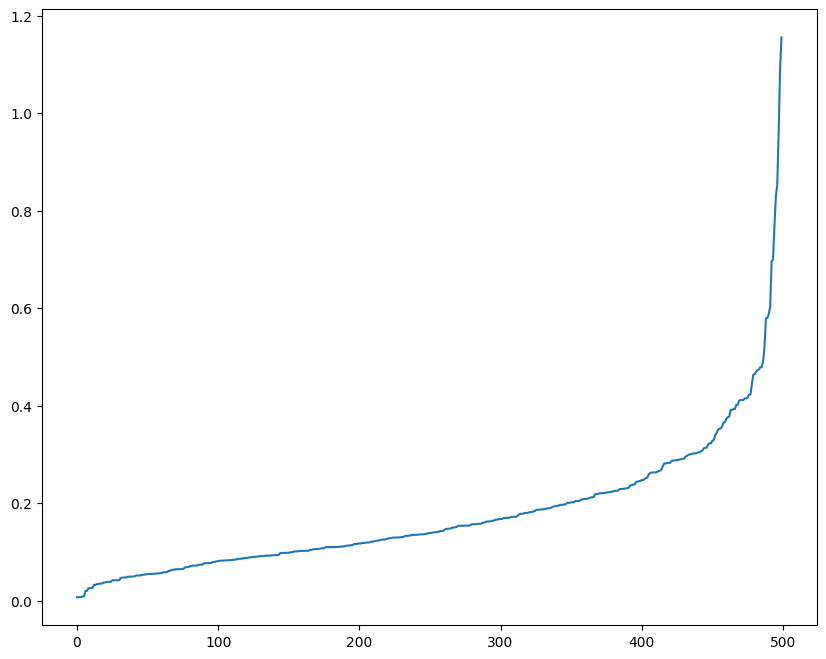

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.8, min_samples=30).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 105


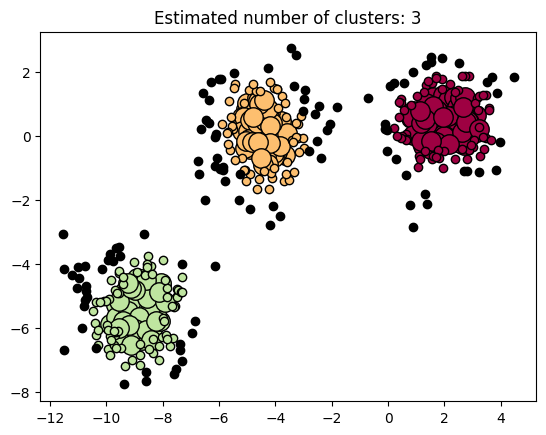

In [ ]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()